# Python之建模时间序列下篇

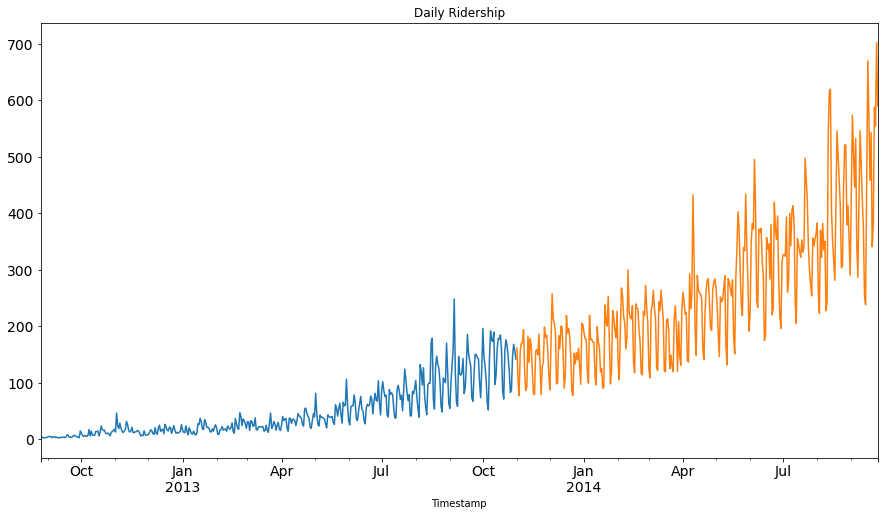

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/train.csv')
train = df[0:10392]
test = df[10392:]
df['Timestamp'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M')
df.index=df['Timestamp']
df = df.resample('D').mean()
train['Timestamp'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train.index = train['Timestamp']
train = train.resample('D').mean()
test['Timestamp'] = pd.to_datetime(test['Datetime'], format='%d-%m-%Y %H:%M')
test.index = test['Timestamp']
test = test.resample('D').mean()
train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14)
plt.show()

![](./img/P10_14.png)

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  433
Model:             SimpleExpSmoothing   SSE                         235166.659
Optimized:                      False   AIC                           2730.736
Trend:                           None   BIC                           2738.878
Seasonal:                        None   AICC                          2730.830
Seasonal Periods:                None   Date:                 Wed, 21 Sep 2022
Box-Cox:                        False   Time:                         16:03:27
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6000000                alpha                False
initial_level              3.1666667                

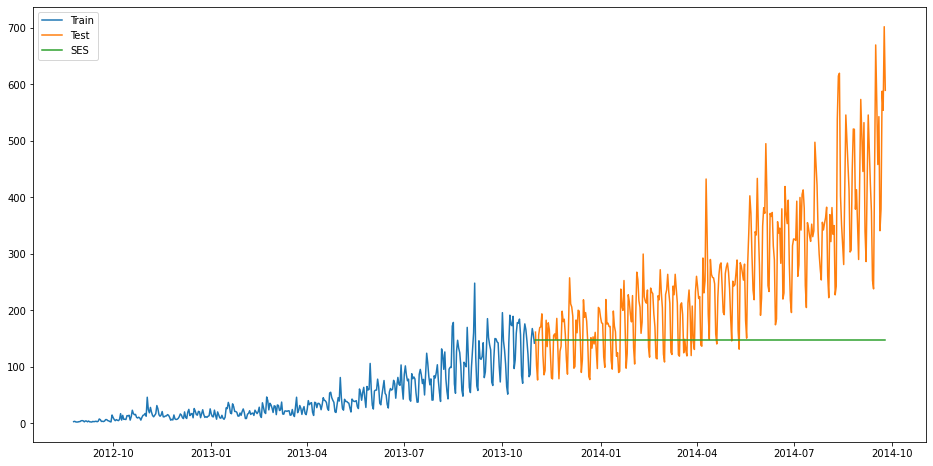

164.61063054927618


In [12]:
from statsmodels.tsa.api import SimpleExpSmoothing
y_hat_avg = test.copy()
fit = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6, optimized=False)
#print(fit.summary())
y_hat_avg['SES'] = fit.forecast(len(test))

plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SES']))
print(rms)

![](./img/P11_2.png)

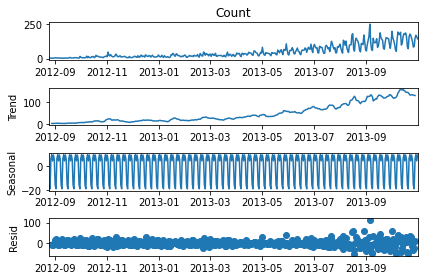

In [13]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['Count']).plot()
result = sm.tsa.stattools.adfuller(train['Count'])
plt.show()

![](./img/P11_3.png)

D:\anaconda3\envs\swin\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


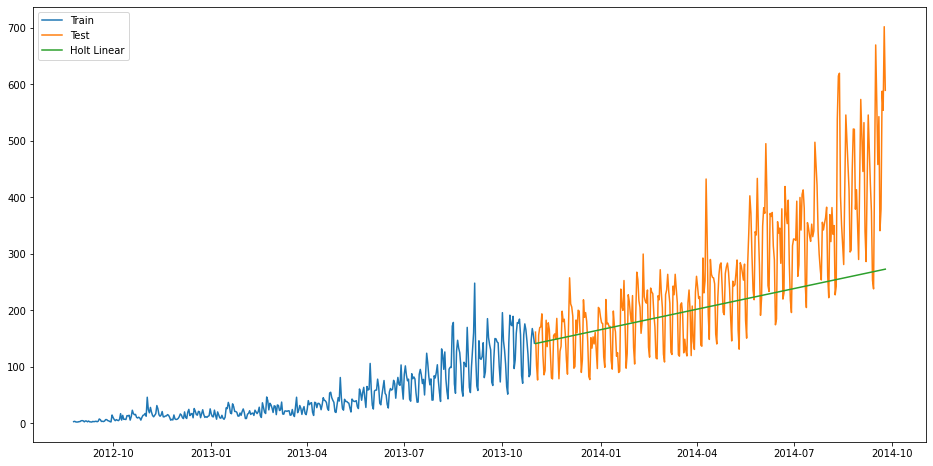

107.23394793380741


In [15]:
from statsmodels.tsa.api import Holt

y_hat_avg = test.copy()
fit = Holt(np.asarray(train['Count'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
y_hat_avg['Holt_linear'] = fit.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt Linear')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_linear']))
print(rms)

![](./img/P11_4.png)

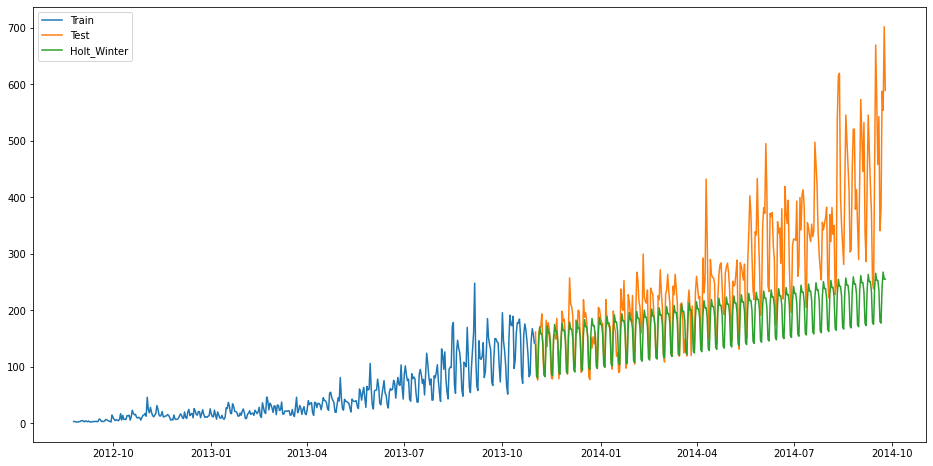

116.00946165049935


In [17]:
from statsmodels.tsa.api import ExponentialSmoothing

y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']), seasonal_periods=7, trend='add', seasonal='add', ).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['Holt_Winter']))
print(rms)

![](./img/P11_5.png)

D:\anaconda3\envs\swin\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


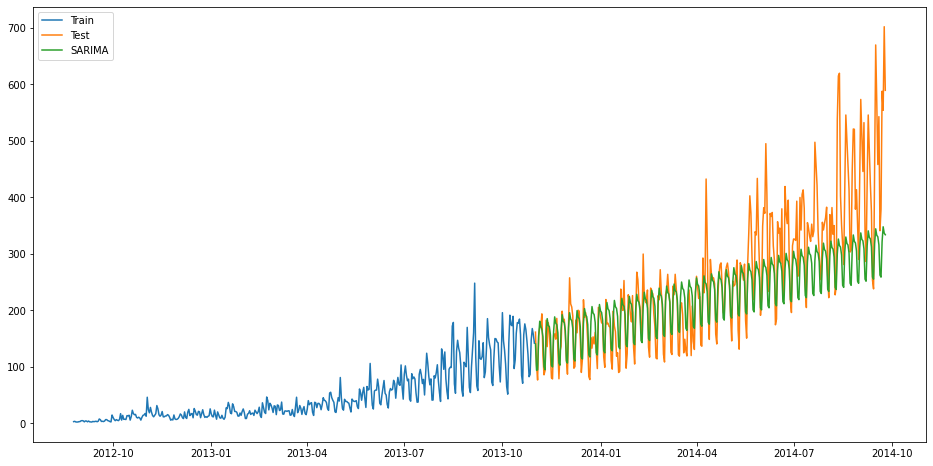

79.45715690770793


In [21]:
import statsmodels.api as sm

y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train['Count'], order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)).fit()
#y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2013-12-31", dynamic=True)
y_hat_avg['SARIMA'] = fit1.forecast(len(test))
plt.figure(figsize=(16, 8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

rms = sqrt(mean_squared_error(test['Count'], y_hat_avg['SARIMA']))
print(rms)

![](./img/P11_6.png)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tushare as ts
import datetime
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

ALL_DATA = ts.get_gdp_year()
YEAR_GDP_DATA = ALL_DATA.loc[::-1,['year','gdp']]
YEAR_GDP_DATA.head(10)

UnicodeDecodeError: 'gbk' codec can't decode byte 0x91 in position 130: illegal multibyte sequence

## Tushare的接口挂掉了。。。

![](./img/P11_7.png)

![](./img/P11_8.png)

![](./img/P11_9.png)

![](./img/P11_10.png)

![](./img/P11_11.png)

![](./img/P11_12.png)

![](./img/P11_13.png)

![](./img/P11_14.png)

![](./img/P11_15.png)

![](./img/P11_16.png)

![](./img/P11_17.png)

![](./img/P11_18.png)

![](./img/P11_19.png)

![](./img/P11_20.png)

![](./img/P11_21.png)

![](./img/P11_22.png)

![](./img/P11_23.png)

![](./img/P11_24.png)

![](./img/P11_25.png)

![](./img/P11_26.png)

![](./img/P11_27.png)

![](./img/P11_28.png)

![](./img/P11_29.png)

# Python之建模SVM篇

* sklearn中svc的使用
* SVM调参